# Autograded section

The block below imports the necessary packages.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

## 1. Data Organization (25 pts)

### 1a: Dow Dataset (2.5 pts)

Read in the `impurity_dataset-training.xlsx` as a `pandas.DataFrame` with a variable name `df`.

In [2]:
########################################
# Start your code here
df = pd.read_excel('impurity_dataset-training.xlsx')
########################################

In [3]:
assert type(df) == pd.core.frame.DataFrame
assert df.shape == (10703, 46)
assert np.isclose(np.linalg.norm(df[df.columns[1:]].loc[1]), 3381.2181210675867)

### 1b: Time data (7.5 pts)

Create a subset of the Dow dataset `df_time` containing only data from Dec. 5 - Dec. 12, 2015. The data should only include columns from `x1` to `x12`.

**Hint:** The problem is much easier if you index by the date.

In [4]:
########################################
# Start your code here
df_time = df.set_index('Date')['2015-12-05':'2015-12-12']
df_time = df_time[df_time.columns[:12]]
########################################

In [5]:
assert df_time.shape == (192, 12), "wrong df_time"
assert np.isclose(np.linalg.norm(df_time.iloc[4]), 2910.9186137459646), "wrong df_time"

### 1c: Removing inconsistent null values (10 pts)

Create a dataframe of all features in the Dow dataset called `df_no_express` that does not contain any expression marks, but still includes blank/null values. Expression marks should be replaced with 0.0. `df_no_express` should only include columns from `x1` to `x40` and the column order should not be changed.

In [6]:
########################################
# Start your code here
df_no_express = df[df.columns[1:41]].replace('!', 0.0)
########################################

In [7]:
assert ('!' in df_no_express.values) == False, 'expression marks not eliminated'
assert df_no_express.columns[1] == 'x2:Primary Column Tails Flow', 'wrong columns'
assert df_no_express.shape == (10703, 40), 'wrong columns'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


### 1d: Mean and variance of features (5 pts)

Save the mean and variance of each feature in `df_no_express` to `mean_no_express` (numpy array) and `var_no_express` (numpy array), respectively.

In [8]:
########################################
# Start your code here
mean_no_express = df_no_express.mean(axis = 0)
var_no_express = df_no_express.var(axis = 0)
########################################

In [9]:
df_no_express

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,...,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow
0,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,...,55.8463,84.7172,124.330,141.965,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614
1,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,...,55.8329,83.4434,110.837,141.352,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637
2,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,...,55.8378,84.1269,113.329,141.587,0.013498,62.8656,45.0085,66.0599,8.69269,100.2490
3,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,...,55.8707,108.7830,127.831,142.125,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200
4,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,...,55.8389,88.9764,124.675,141.955,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,397.654,48.9312,2302.54,2405.74,120.2160,116.8420,53.6651,40.9795,53.3360,11.24620,...,56.4235,94.0371,120.704,142.125,0.014539,62.9370,45.0085,71.3254,8.99703,121.7330
10699,394.109,48.9401,2290.11,2408.52,123.6580,118.0100,54.4188,41.0057,52.7054,11.10770,...,56.4379,94.2743,122.310,142.239,0.014117,62.9370,45.0085,73.9447,9.00320,124.9870
10700,396.095,48.8380,2296.40,2398.71,122.8430,119.7030,53.9685,40.9757,53.1350,11.31050,...,56.4568,95.8344,122.788,142.267,0.014004,62.9404,45.0085,71.8156,9.00187,124.2270
10701,392.233,49.0474,2287.61,2394.63,122.9340,119.9190,54.4196,41.0498,52.7341,11.34930,...,56.5090,93.5994,116.939,142.060,0.014529,62.9370,45.0085,72.0492,9.00924,124.4240


In [11]:
assert len(mean_no_express) == 40
assert len(var_no_express) == 40
assert np.isclose(np.linalg.norm(mean_no_express) * np.linalg.norm(var_no_express), 1857023957.6543484)

## 2. APIs (25 pts)

### 2a: Get CID (7.5 pts)

Write a function `getCID` that takes the name of a compound `name` as an argument and uses the PubChem RESTful API to return its CID. The data type of returned value should be **integer**.

In [10]:
import requests

In [11]:
def getCID(name):
########################################
# Start your code here
    r = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{}/cids/TXT'.format(name))
    return int(r.text)
########################################

In [12]:
assert getCID('methanol') == 887, "test run #1 failed"
assert getCID('ethanol') == 702, "test run #2 failed"
assert getCID('1,5-heptadiene') == 5364394, "test run #3 failed"

### 2b: Get SMILES (7.5 pts)

Write a function `getSMILES` that takes the CAS number of a compound (`CAS`, string) as an argument and uses the PubChem RESTful API to extract its record as a JSON, and then extract the SMILES notation (string) from this JSON record.

In [13]:
import json

In [14]:
def getSMILES(CAS):
########################################
# Start your code here
    r = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{}/record/json'.format(CAS))
    chem_json = json.loads(r.text)
    
    smiles = chem_json['PC_Compounds'][0]['props'][18]['value']['sval']
    
    return smiles
########################################

In [15]:
assert getSMILES('108-95-2') == 'C1=CC=C(C=C1)O', 'test run #1 failed'
assert getSMILES('64-17-5') == 'CCO', 'test run #2 failed'
assert getSMILES('627-20-3') == 'CCC=CC', 'test run #3 faield'

### 2c: Count Bonds (10 pts)

Write a function `countBonds` that takes an arbitrary chemical name or CAS number (`name`, string), uses the PubChem RESTful API, and returns the number of C-H bonds in the compound.

In [16]:
def countBonds(name):
########################################
# Start your code here
    r = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{}/record/json'.format(name))
    chem_json = json.loads(r.text)
    
    bonds = chem_json['PC_Compounds'][0]['bonds']
    aid_1 = np.array(bonds['aid1']).reshape(-1, 1)
    aid_2 = np.array(bonds['aid2']).reshape(-1, 1)
    
    bond_pair = np.append(aid_1, aid_2, axis = 1)
    
    atoms = chem_json['PC_Compounds'][0]['atoms']
    
    count = 0
    for pair in bond_pair:
        if atoms['element'][pair[0] - 1] == 6 and atoms['element'][pair[1] - 1] == 1:
            count += 1
        elif atoms['element'][pair[0] - 1] == 1 and atoms['element'][pair[1] - 1] == 6:
            count += 1
    
    return count
########################################

In [17]:
assert countBonds('ethanol') == 5, "test run #1 failed"
assert countBonds('water') == 0, "test run #2 failed"
assert countBonds('108-95-2') == 5, "test run #3 failed"

# Peer-graded section

Create a version of the Dow dataset that does not contain any null or non-numeric values. Print the first 10 rows of the data.

In [19]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    elif pd.isnull(x):
        return False
    else:
        return True
    
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X_dow = df[df.columns[1:]][real_rows]

X_dow.head(10)

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,...,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
0,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,...,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
1,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,...,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,...,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
3,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,...,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
4,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,...,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
5,328.884,46.0729,2100.26,2134.76,99.3376,95.4188,53.9989,41.0217,53.0389,6.94884,...,62.8690,45.0085,67.6828,8.69795,100.8260,5.28510,1.51144,1.73488,3.31077,0.290129
6,327.335,46.0581,2101.57,2191.37,98.9044,94.9811,54.0685,41.0499,52.8279,6.98656,...,62.8720,45.0085,66.0828,8.70780,100.3580,5.35512,1.51096,1.72619,3.30961,0.290165
7,329.935,45.9708,2099.27,2133.95,99.6756,94.8352,54.0001,40.9886,52.7697,6.93838,...,62.8694,45.0085,67.5438,8.69391,101.1360,5.31343,1.51180,1.71750,3.31009,0.287436
8,329.128,45.8875,2099.12,2055.11,98.8823,95.0573,53.9876,41.0169,52.8802,6.92111,...,62.8690,45.0085,66.9394,8.70810,100.3630,5.35183,1.48168,1.70881,3.32848,0.288816
9,327.686,45.8192,2109.75,2185.82,98.8448,95.5414,54.0806,41.0029,53.0875,6.97721,...,62.8690,45.0085,65.5845,8.69685,100.2790,5.31385,1.51268,1.70012,3.31516,0.291564


Show that your data does not contain any null values.

***Hint***: It could be useful to use `pandas.isnull` function. Please refer to the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html).

In [20]:
X_dow.isnull().any()

x1:Primary Column Reflux Flow                    False
x2:Primary Column Tails Flow                     False
x3:Input to Primary Column Bed 3 Flow            False
x4:Input to Primary Column Bed 2 Flow            False
x5:Primary Column Feed Flow from Feed Column     False
x6:Primary Column Make Flow                      False
x7:Primary Column Base Level                     False
x8:Primary Column Reflux Drum Pressure           False
x9:Primary Column Condenser Reflux Drum Level    False
x10:Primary Column Bed1 DP                       False
x11:Primary Column Bed2 DP                       False
x12:Primary Column Bed3 DP                       False
x13:Primary Column Bed4 DP                       False
x14:Primary Column Base Pressure                 False
x15:Primary Column Head Pressure                 False
x16:Primary Column Tails Temperature             False
x17:Primary Column Tails Temperature 1           False
x18:Primary Column Bed 4 Temperature             False
x19:Primar

Drop the `Avg_Delta_Composition_Primary_Column` column. Show the first 5 rows of the data.

In [21]:
df_no_avg_delta = X_dow.drop('Avg_Delta_Composition Primary Column', axis = 1)
df_no_avg_delta.head(5)

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,...,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
0,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,...,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.77833,3.32803,0.291226
1,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,...,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.76964,3.29556,0.294044
2,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,...,0.013498,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.76095,3.23481,0.300552
3,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,...,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.75226,3.31287,0.293752
4,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,...,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.74357,3.33435,0.286107


Let's assume that features from `x1` to `x40` are independent of each other and normally distributed dataset. For these features, use a z-score cutoff of 3 and assess what percentage of the data is identified as outliers with this approach.

***You may identify a data point (a single row) as an outlier whenever z-score > 3 is detected in any features.***

In [22]:
# for each feature

for col in X_dow.columns[:40]:
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers = xi[np.abs(zi) < z_cutoff]
    print(col)
    print('Percentage of outliers: {:.2f}%'.format(100 - xi_nooutliers.shape[0] / xi.shape[0] * 100))
    print()

x1:Primary Column Reflux Flow
Percentage of outliers: 2.97%

x2:Primary Column Tails Flow
Percentage of outliers: 2.90%

x3:Input to Primary Column Bed 3 Flow
Percentage of outliers: 2.98%

x4:Input to Primary Column Bed 2 Flow
Percentage of outliers: 3.21%

x5:Primary Column Feed Flow from Feed Column
Percentage of outliers: 4.22%

x6:Primary Column Make Flow
Percentage of outliers: 5.17%

x7:Primary Column Base Level
Percentage of outliers: 2.67%

x8:Primary Column Reflux Drum Pressure
Percentage of outliers: 1.95%

x9:Primary Column Condenser Reflux Drum Level
Percentage of outliers: 2.95%

x10:Primary Column Bed1 DP
Percentage of outliers: 0.07%

x11:Primary Column Bed2 DP
Percentage of outliers: 0.04%

x12:Primary Column Bed3 DP
Percentage of outliers: 0.00%

x13:Primary Column Bed4 DP
Percentage of outliers: 0.00%

x14:Primary Column Base Pressure
Percentage of outliers: 1.94%

x15:Primary Column Head Pressure
Percentage of outliers: 1.94%

x16:Primary Column Tails Temperature
Pe

In [23]:
# for the whole dataset

xi_nooutliers = pd.DataFrame()
for col in X_dow.columns[:40]:
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers[col] = xi[np.abs(zi) < z_cutoff]
    
## observations without outliers in any features
xi_nooutliers_in_any_features = xi_nooutliers.loc[~xi_nooutliers.isnull().any(axis = 1)]

## percentage
print('Percentage of outliers: {:.2f}%'.format(100 - xi_nooutliers_in_any_features.shape[0] / X_dow.shape[0] * 100))

Percentage of outliers: 7.58%


Remove those outliers and plot the distribution of each feature as histograms before & after outlier removals.

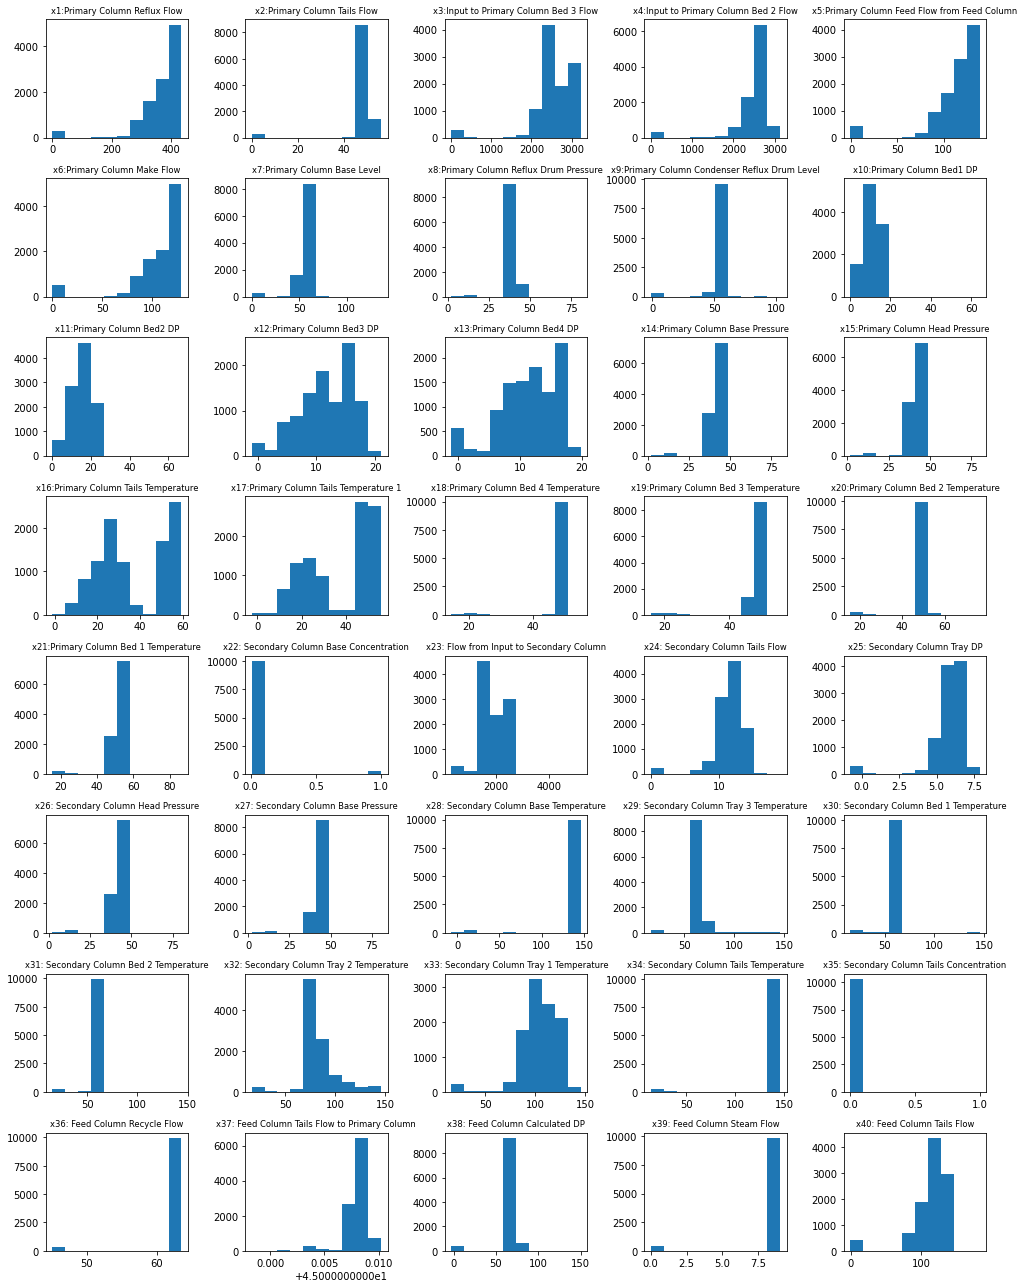

In [24]:
# Histograms before removing outliers
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.hist(X_dow.iloc[:, i])
    ax.set_title(X_dow.columns[i], fontsize = 'small')
plt.tight_layout()

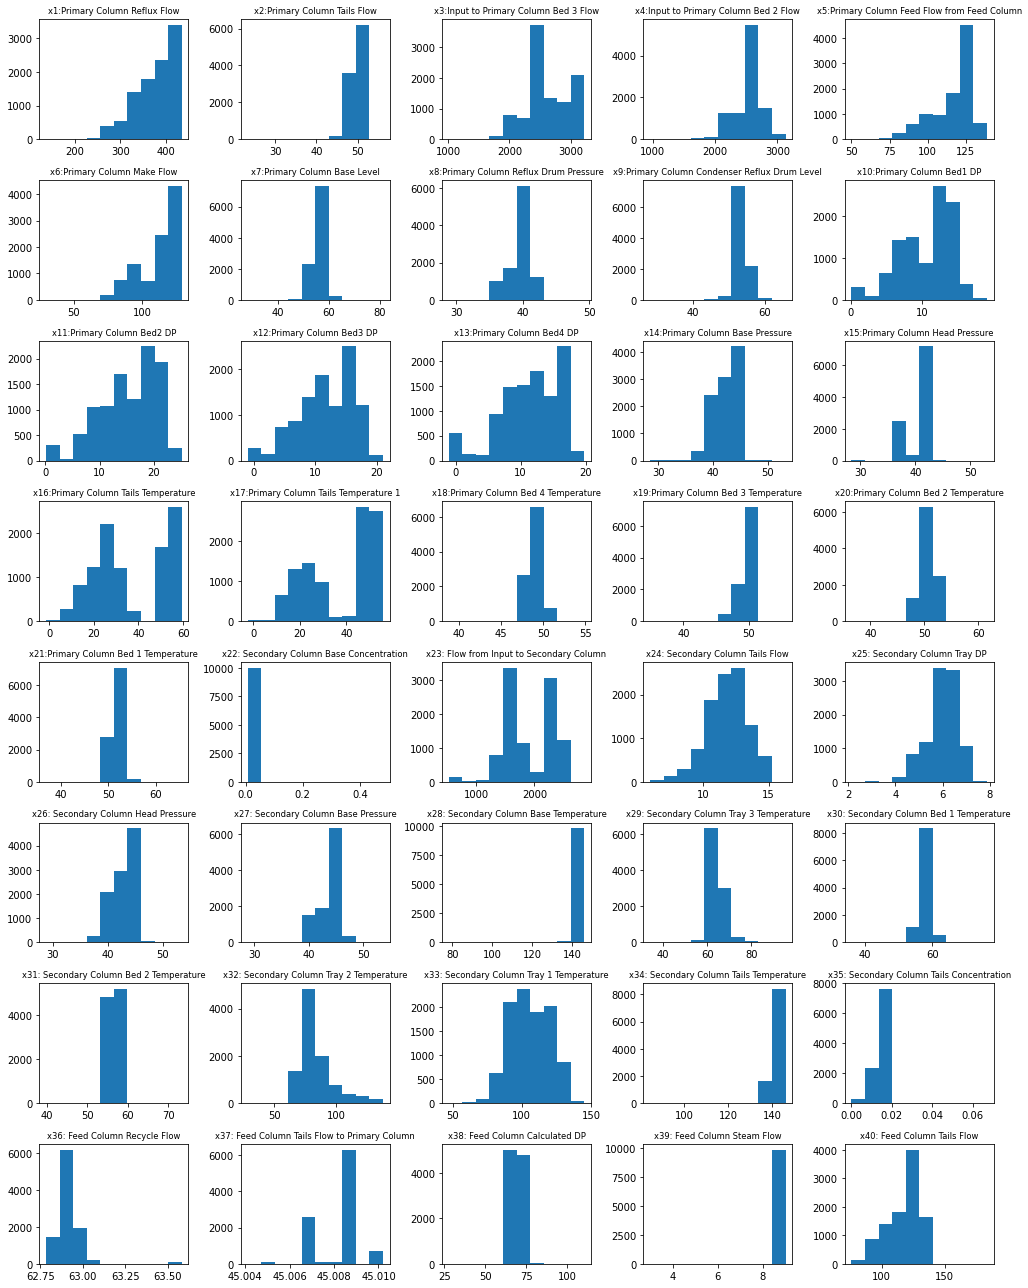

In [25]:
# Histograms after removing outliers
fig, axes = plt.subplots(8, 5, figsize=(14, 18))
axes = axes.ravel()

for i, col in enumerate(X_dow.columns[:40]):
    xi = X_dow[col].copy()
    mu = np.mean(xi)
    stdev = np.std(xi)
    z_cutoff = 3

    zi = (xi - mu)/stdev
    xi_nooutliers = xi[np.abs(zi) < z_cutoff]

    axes[i].hist(xi_nooutliers)
    axes[i].set_title(col, fontsize = 'small')

plt.tight_layout()

**IMPORTANT NOTE**: For this question, we are looking the percentage that would be considered outliers if all points that were outliers in any feature were dropped. The goal is to highlight that points that are outliers in one feature are also likely outliers in others, so that the percentage of outliers for the whole dataset is typically much less than the sum of percentages from each feature.

For peer grading, please accept any reasonable response to the question, since there was some ambiguity in what we asked. 

## 2. Online Data Access

Rank the following approaches from most reliable to least reliable:

- HTML scraping
- Unofficial Python API
- JSON file returned from HTTP request
- RESTful API
- Official Python API (developed by data maintainer)

Briefly rationalize your rankings.

1. Official Python API
2. RESTful API
3. Unofficial Python API
4. JSON file returned from HTTP request
5. HTML scraping

In general, APIs are definitely more reliable than directly dealing with JSON or HTML. Among APIs, official ones should be placed first, since they are consistently maintained by data professionals. With similar reasoning, unofficial Python API would be the least reliable. HTML scraping is the most tedious and time-consuming approach to handle, so I will put this at the bottom of the list.